In [100]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [101]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os
from mpl_toolkits.mplot3d import Axes3D

In [102]:
initial_data = yf.download("EBAY ^VIX", start="2020-10-02", end="2021-10-01")

[*********************100%***********************]  2 of 2 completed


In [103]:
initial_data.head()

Adj Close                 Close                  High             \
                 EBAY       ^VIX       EBAY       ^VIX       EBAY       ^VIX   
Date                                                                           
2020-10-01  51.641823  26.700001  52.380001  26.700001  52.860001  27.110001   
2020-10-02  50.951687  27.629999  51.680000  27.629999  52.430000  29.900000   
2020-10-05  51.040413  27.959999  51.770000  27.959999  52.110001  29.690001   
2020-10-06  48.960152  29.480000  49.660000  29.480000  51.910000  30.000000   
2020-10-07  50.222115  28.059999  50.939999  28.059999  51.110001  29.760000   

                  Low                  Open              Volume       
                 EBAY       ^VIX       EBAY       ^VIX     EBAY ^VIX  
Date                                                                  
2020-10-01  52.000000  25.330000  52.369999  25.780001  6659600    0  
2020-10-02  51.189999  26.930000  51.610001  28.870001  5456700    0  
2020-10-05  51.150002  27.270000  51.939999  29.520000  4954700    0  
2020-10-06  49.490002  26.010000  51.910000  28.049999  8824800    0  
2020-10-07  49.980000  27.940001  50.549999  29.260000  6016400    0

In [104]:
initial_data['Adj Close'].head()

,EBAY,^VIX
Date,,
2020-10-01,51.641823,26.700001
2020-10-02,50.951687,27.629999
2020-10-05,51.040413,27.959999
2020-10-06,48.960152,29.480000
2020-10-07,50.222115,28.059999


In [105]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-01 to 2021-09-30
Data columns (total 2 columns):
EBAY    252 non-null float64
^VIX    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB


In [106]:
data.tail()

,EBAY,^VIX
Date,,
2021-09-24,72.803772,17.750000
2021-09-27,73.482040,18.760000
2021-09-28,71.078194,23.250000
2021-09-29,69.791481,22.559999
2021-09-30,69.492241,23.139999


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000288256A7668>,
      dtype=object)

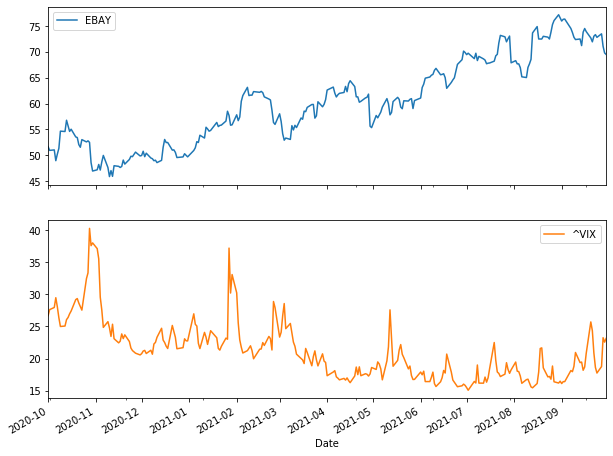

In [107]:
data.plot(figsize=(10, 8), subplots=True)

In [108]:
data.describe().round(2)

,EBAY,^VIX
count,252.00,252.00
mean,60.40,21.27
std,8.24,4.62
min,45.88,15.07
25%,53.34,17.68
50%,60.41,20.78
75%,67.59,23.25
max,77.17,40.28


# Rolling Statistics

In [109]:
sym = 'EBAY'
EBAY_data = pd.DataFrame(data[sym]).dropna()
EBAY_data.tail()

,EBAY
Date,
2021-09-24,72.803772
2021-09-27,73.482040
2021-09-28,71.078194
2021-09-29,69.791481
2021-09-30,69.492241


In [110]:
window = 10
EBAY_data['min'] = data[sym].rolling(window=window).min()
EBAY_data['mean'] = data[sym].rolling(window=window).mean()
EBAY_data['std'] = data[sym].rolling(window=window).std()
EBAY_data['median'] = data[sym].rolling(window=window).median()
EBAY_data['max'] = data[sym].rolling(window=window).max()
EBAY_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
EBAY_data.dropna().head()

,EBAY,min,mean,std,median,max,ewma
Date,,,,,,,
2020-10-14,55.664322,48.960152,52.587306,2.617615,51.493937,56.7784,55.793489
2020-10-15,54.619263,48.960152,52.885050,2.666991,52.972795,56.7784,54.912819
2020-10-16,55.043201,48.960152,53.294201,2.651231,54.609402,56.7784,55.010606
2020-10-19,53.554478,48.960152,53.545608,2.530203,54.609402,56.7784,53.918510
2020-10-20,53.436169,50.222115,53.993209,1.960710,54.609402,56.7784,53.556754


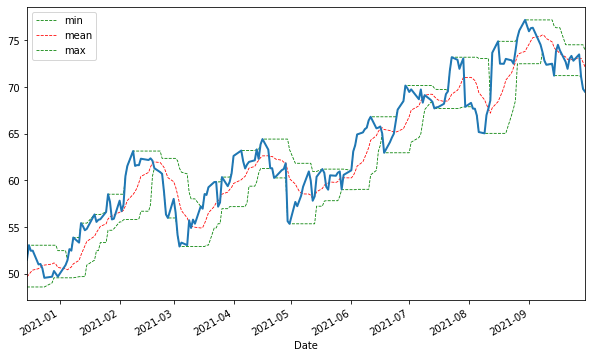

In [111]:
ax = EBAY_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [112]:
EBAY_data['SMA1'] = data[sym].rolling(window=20).mean()
EBAY_data['SMA2'] = data[sym].rolling(window=60).mean()
EBAY_data[[sym, 'SMA1', 'SMA2']].tail()

,EBAY,SMA1,SMA2
Date,,,
2021-09-24,72.803772,74.074158,71.408093
2021-09-27,73.482040,73.946352,71.475122
2021-09-28,71.078194,73.641632,71.497442
2021-09-29,69.791481,73.303996,71.515899
2021-09-30,69.492241,72.980822,71.511953


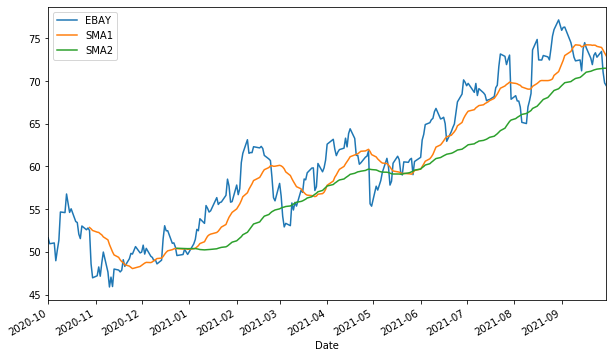

In [113]:
EBAY_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

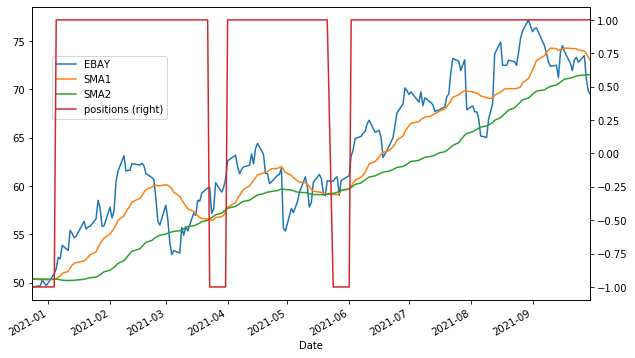

In [114]:
EBAY_data.dropna(inplace=True)
EBAY_data['positions'] = np.where(EBAY_data['SMA1'] > EBAY_data['SMA2'],1,-1)
ax = EBAY_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

In [115]:
Corr_data = data[['EBAY', '^VIX']].dropna()
Corr_data.tail()

,EBAY,^VIX
Date,,
2021-09-24,72.803772,17.750000
2021-09-27,73.482040,18.760000
2021-09-28,71.078194,23.250000
2021-09-29,69.791481,22.559999
2021-09-30,69.492241,23.139999


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028825607C18>,
      dtype=object)

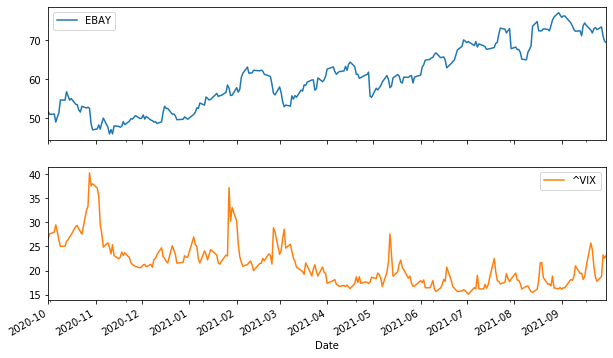

In [116]:
Corr_data.plot(subplots=True, figsize=(10, 6))


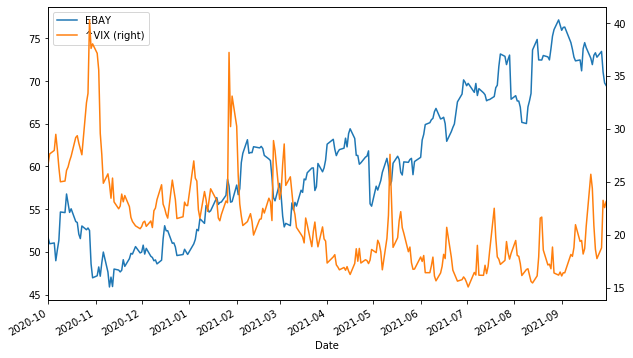

In [117]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));

In [118]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,EBAY,^VIX
Date,,
2020-10-01,NaN,NaN
2020-10-02,-0.013454,0.034239
2020-10-05,0.001740,0.011873
2020-10-06,-0.041611,0.052937
2020-10-07,0.025449,-0.049367


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028825B754A8>,
      dtype=object)

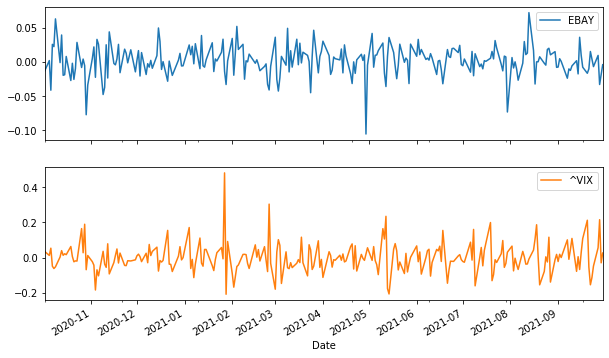

In [119]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028825CDBEF0>,
      dtype=object)

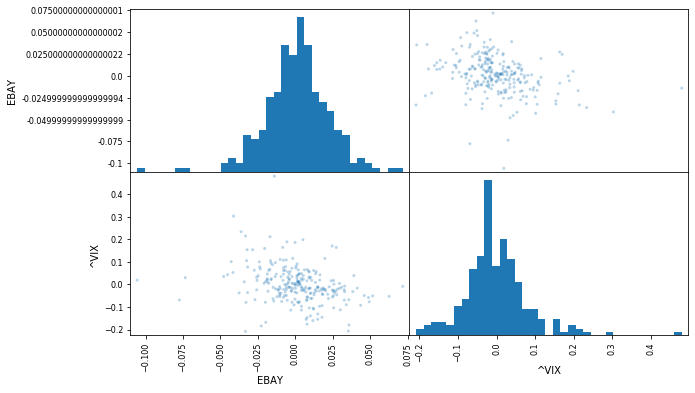

In [120]:
pd.plotting.scatter_matrix(sprets, alpha=0.3, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

In [121]:
bvol = data["EBAY"]
log_return = np.log(bvol / bvol.shift(1))

In [122]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 34.9 %


In [123]:
vix = data['^VIX'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 23.14 %


# BINOMIAL TREE METHOD

In [124]:
S0 = 69.49              # spot stock price
K = 67                  # strike
T = 1.0                 # maturity 
r = 0.0146              # risk free rate 
sig = 0.349             # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [125]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [126]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [127]:
S

array([[ 69.49      ,  85.00228184, 103.97737685, 127.18829029],
       [  0.        ,  56.80859379,  69.49      ,  85.00228184],
       [  0.        ,   0.        ,  46.44144954,  56.80859379],
       [  0.        ,   0.        ,   0.        ,  37.96623171]])

In [128]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.46182021692880976

In [129]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 10.19140621],
       [ 0.        ,  0.        ,  0.        , 29.03376829]])

In [130]:
# for American Option
if payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 8.58374803,  2.92322159,  0.        ,  0.        ],
       [ 0.        , 13.51894198,  5.4581809 ,  0.        ],
       [ 0.        ,  0.        , 20.55855046, 10.19140621],
       [ 0.        ,  0.        ,  0.        , 29.03376829]])

In [131]:
print('American ' + payoff, str( V[0,0]))

American put 8.583748032910133


# MONTE CARLO SIMULATION METHOD

In [132]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [133]:
T = 1
r = 0.0146
sigma = 0.349
S0 = 69.49
K = 67

In [134]:
S = mcs_simulation_np(1000)

In [135]:
S = np.transpose(S)
S

array([[69.49      , 67.68595331, 67.0469367 , ..., 43.61969744,
        44.33629543, 44.53266209],
       [69.49      , 70.03265378, 70.008892  , ..., 78.83973247,
        79.12096074, 78.91713043],
       [69.49      , 68.30963487, 67.18353122, ..., 31.27836874,
        30.9227636 , 31.19428407],
       ...,
       [69.49      , 68.96293867, 69.71716848, ..., 70.6202132 ,
        69.94792052, 70.78687772],
       [69.49      , 69.77093484, 70.47462668, ..., 60.73748278,
        60.26928445, 60.7258501 ],
       [69.49      , 69.62052326, 68.5716771 , ..., 96.08546066,
        96.7847152 , 95.75252037]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

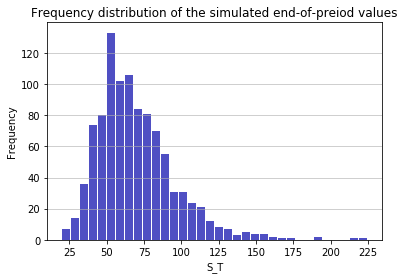

In [136]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [137]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('American put', str(p))

American put 8.419064339097643


# DELTA

In [138]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [139]:
delta(69.49, 67, 1, 0.0146, 0.0096, 0.349, 'put')

-0.38093999737542295

In [140]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

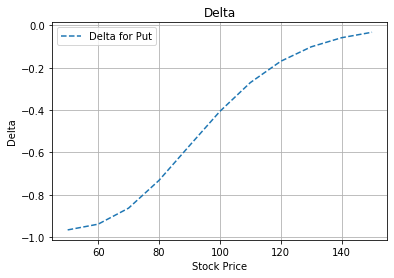

In [141]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

## Surface of Delta

In [142]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [143]:
S = np.linspace(30, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 67, T[i], 0.0146, 0.0096, 0.349, 'put')

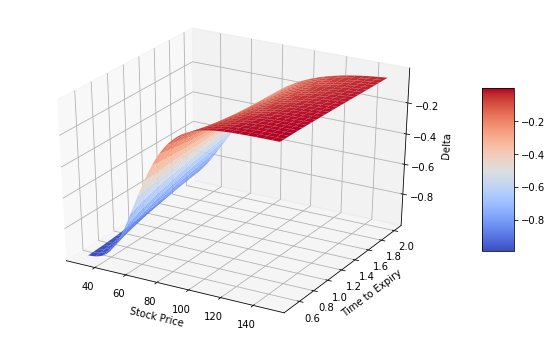

In [144]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# GAMMA

In [145]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [146]:
gamma(69.49, 67, 1, 0.0146, 0.0096, 0.349, 'put')

0.015606389180427935

In [147]:
S = np.linspace(20,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 67, 1, 0.0146, 0.0096, 0.349, 'put')

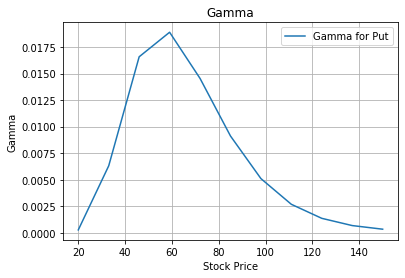

In [148]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

# Surface of Gamma

In [149]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [150]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 67, T[i], 0.0146, 0.0096, 0.349, 'put')

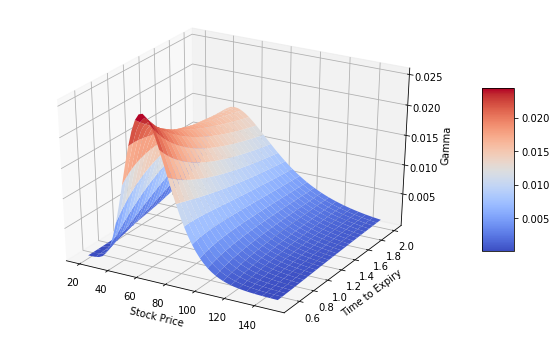

In [151]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# SPEED

In [152]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [153]:
speed(69.49, 67, 1, 0.0146, 0.0096, 0.349, 'put')

-0.0004133794383613994

In [154]:
S = np.linspace(10,150,40)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 67, 1, 0.0146, 0.0096, 0.349, 'put')

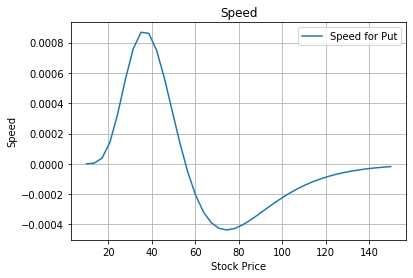

In [155]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

# Surface of Speed

In [156]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [157]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 67, T[i], 0.0146, 0.0096, 0.349, 'put')

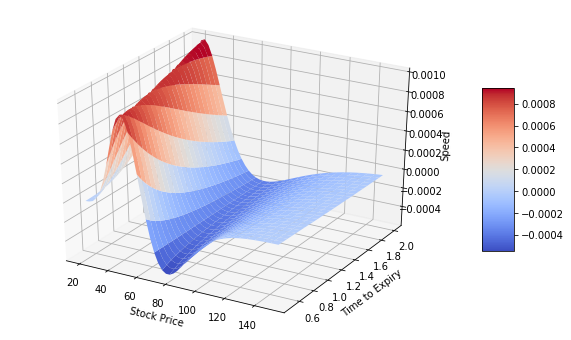

In [158]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# THETA

In [159]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [160]:
theta(69.49, 67, 1, 0.0146, 0.0096, 0.349, 'put')

4.838789858556156

In [161]:
T = np.linspace(0.25,3,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(69.49, 67, T[i], 0.0146, 0.0096, 0.349, 'put')

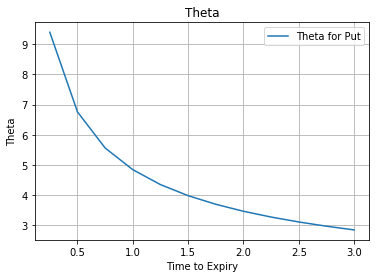

In [162]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

# Surface of Theta

In [163]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        theta = -vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [164]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 67, T[i], 0.0146, 0.0096, 0.349, 'put')

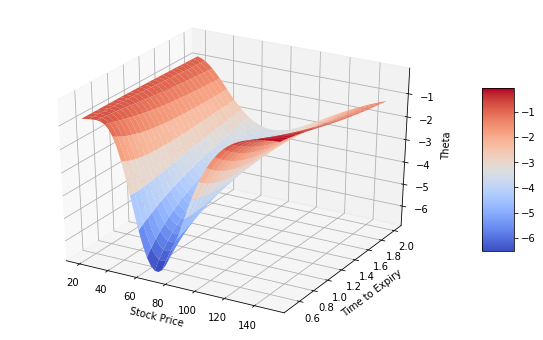

In [165]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# RHO

In [166]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [167]:
rho(69.49, 67, 1, 0.0146, 0.0096, 0.349, 'put')

-34.478740404608

In [168]:
r = np.linspace(0,0.1,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(100, 100, 1, r[i], 0.03, 0.25, 'put')

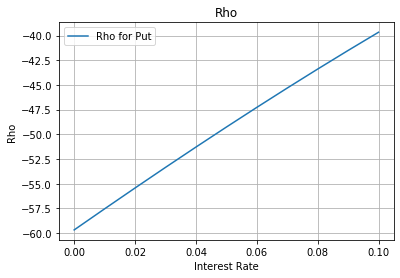

In [169]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

# Surface of Rho

In [170]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [171]:
S = np.linspace(20, 200, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 67, T[i], 0.0146, 0.0096, 0.349, 'put')

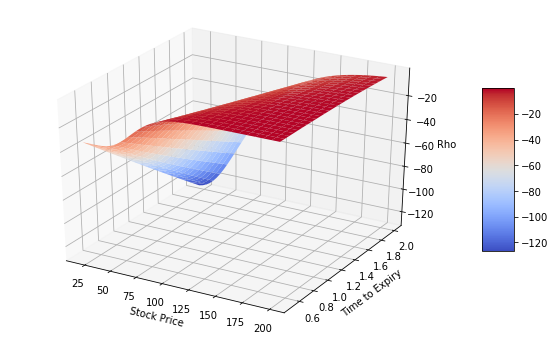

In [172]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# VEGA

In [173]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [174]:
vega(69.49, 67, 1, 0.0146, 0.0096, 0.349, 'put')

26.301013436435603

In [175]:
vol = np.linspace(0.1,0.8,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(69.49, 67, 1, 0.0146, 0.0096, vol[i], 'put')

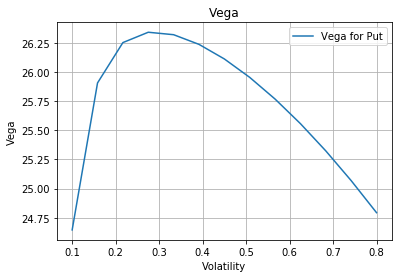

In [176]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

# Surface of Vega

In [177]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [178]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 67, T[i], 0.0146, 0.0096, 0.349, 'put')

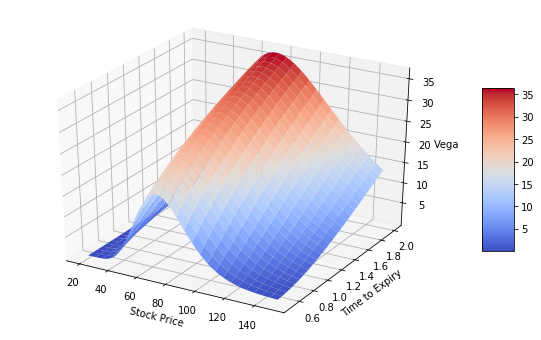

In [179]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);